In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
#Stellar Classification Temperatures from here:
#https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectral_class.html
def get_bolometric_correction(Teff):
    if Teff > 28000: #O Star
        bolo_correct = 0.
        print("O STAR")
    elif ((Teff <= 28000) and (Teff > 10000)): #B Star
        bolo_correct = -2.
    elif ((Teff <= 10000) and (Teff > 7500)): #A Star
        bolo_correct = -0.3
    elif ((Teff <= 7500) and (Teff > 6000)): #F Star
        bolo_correct = -0.15
    elif ((Teff <= 6000) and (Teff > 4900)): #G Star
        bolo_correct = -0.4
    elif ((Teff <= 4900) and (Teff > 3500)): #K Star
        bolo_correct = -0.8
    elif ((Teff <= 3500) and (Teff > 2000)): #M Star
        bolo_correct = -2.
    elif (Teff <= 2000): #L Star
        bolo_correct = 0.
        print("L STAR")
    else:
        print("A MISTAKE HAPPENED")
    return bolo_correct

def compute_stellar_luminosity(mV,Teff,dist): #DIST IN PC! 
    Mbolsun = 4.72
    MV = mV - 5*np.log10(dist/10.)
    BC = get_bolometric_correction(Teff)
    Mbol = MV + BC
    exp = (Mbol - Mbolsun)/(-2.5)
    return 10.**exp #stellar luminosity in units of Lsun

def calculate_habitable_zone(mV, Teff, dist):
    Lstar = compute_stellar_luminosity(mV,Teff,dist)
    rmin = np.sqrt(Lstar/1.1)
    rmax = np.sqrt(Lstar/0.53)
    return rmin,rmax ## units in AU

def calculate_Sun_habitable_zone():
    rmin = np.sqrt(1./1.1)
    rmax = np.sqrt(1./0.53)
    return rmin,rmax ## units in AU

def add_orbit_to_plot(ax, a, e, color):
    theta = np.linspace(0, 2*np.pi, 2000)#, endpoint=True)
    r = np.sqrt(((a**2)*(1.-e**2))/(1.- ((e**2) * np.cos(theta)**2)))

    ax.plot(theta, r,color=color)
    return 

#Stellar Classification Temperatures from here:
#https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectral_class.html
def get_spectral_type(Teff):
    if Teff > 28000: #O Star
        return 'O'
    elif ((Teff <= 28000) and (Teff > 10000)): #B Star
        return 'B'
    elif ((Teff <= 10000) and (Teff > 7500)): #A Star
        return 'A'
    elif ((Teff <= 7500) and (Teff > 6000)): #F Star
        return 'F'
    elif ((Teff <= 6000) and (Teff > 4900)): #G Star
        return 'G'
    elif ((Teff <= 4900) and (Teff > 3500)): #K Star
        return 'K'
    elif ((Teff <= 3500) and (Teff > 2000)): #M Star
        return 'M'
    elif (Teff <= 2000): #L Star
        return 'L'
    else:
        print("A MISTAKE HAPPENED")
    return 

def plot_ring(ax,rmin,rmax,alpha,color):
    theta = np.linspace(0, 2*np.pi, 50, endpoint=True)
    r1 = rmin*np.ones(len(theta))
    r2 = rmax*np.ones(len(theta))

    ax.fill_between(theta, r1, r2,color='g',alpha=0.1)
    #ax.set_yticks(np.arange(0, 10, 0.05))
    ax.set_yticks([rmin,rmax]) #([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_xticks([])
    ax.set_rlim(0,rmax+0.2*rmax)
    return

def orbit_minmax_radius(a, e):
    theta = np.linspace(0, 2*np.pi, 2000)#, endpoint=True)
    r = np.sqrt(((a**2)*(1.-e**2))/(1.- ((e**2) * np.cos(theta)**2)))
    return np.min(r),np.max(r)



In [53]:
df = pd.read_csv('/Users/dalek/data/exoplanets.csv')
df2=df.dropna(subset=['V','DIST','TEFF','A','ECC']).reset_index(drop=True)
sun_like = np.where((df2['TEFF'] < 6000.) & (df2['TEFF']>5500.))[0]

<ipython-input-53-0eaca9727c13>:1: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/dalek/data/exoplanets.csv')


In [54]:
#create Habitable Zone data 
hz = np.zeros((len(df2['V']),2))
orbit_sizes = np.zeros((len(df2['V']),2))

for i in range(len(df2['V'])):
    hz[i,:] = calculate_habitable_zone(df2['V'][i], df2['TEFF'][i], df2['DIST'][i])
    orbit_sizes[i,:] = orbit_minmax_radius(df2['A'][i],df2['ECC'][i])
    

<ipython-input-40-8b491cb04f6d>:28: RuntimeWarning: divide by zero encountered in log10
  MV = mV - 5*np.log10(dist/10.)


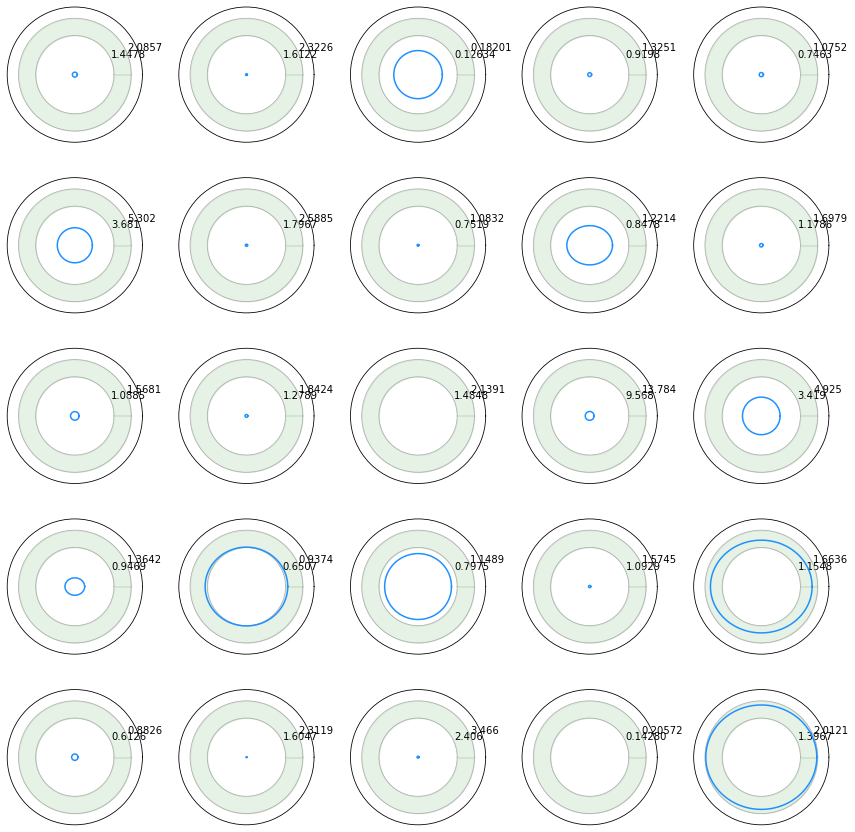

In [55]:
fig, ax = plt.subplots(5,5,subplot_kw={'projection': 'polar'})#,sharey=True)
ax = ax.flatten()
for i in range(len(ax)):
    plot_ring(ax[i],hz[i,0],hz[i,1],0.01,'DodgerBlue')
    add_orbit_to_plot(ax[i],df2['A'][i],df2['ECC'][i], 'DodgerBlue')

fig.set_size_inches(12,12)
plt.tight_layout()

In [50]:
def check_if_habitable(i,hz,orbit_sizes):
    if ((orbit_sizes[i,0] > hz[i,0]) and (orbit_sizes[i,0] < hz[i,1])):
        is_habitable = True
    elif ((orbit_sizes[i,1] > hz[i,0]) and (orbit_sizes[i,1] < hz[i,1])):
        is_habitable = True
    elif ((orbit_sizes[i,0] < hz[i,0]) and (orbit_sizes[i,1] > hz[i,0])):
        is_habitable = True
    else:
        is_habitable = False
    return is_habitable



In [67]:
habitable = []
for i in range(len(df2['A'])):
    is_habitable = check_if_habitable(i,hz,orbit_sizes)
    if is_habitable:
        habitable.append(i)


In [71]:
len(habitable), len(df2['A']),len(habitable)/len(df2['A'])



(68, 895, 0.07597765363128492)

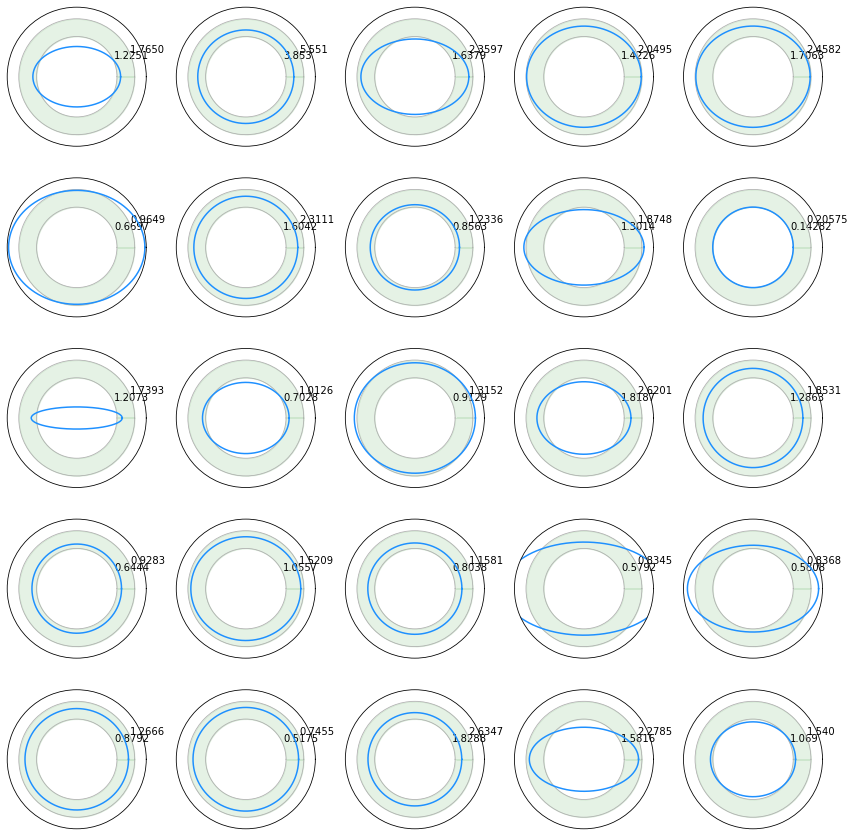

In [89]:
fig, ax = plt.subplots(5,5,subplot_kw={'projection': 'polar'})#,sharey=True)
ax = ax.flatten()
idx_ax = 0
for i in habitable[25:50]:
    plot_ring(ax[idx_ax],hz[i,0],hz[i,1],0.01,'DodgerBlue')
    add_orbit_to_plot(ax[idx_ax],df2['A'][i],df2['ECC'][i], 'DodgerBlue')
    idx_ax +=1

fig.set_size_inches(12,12)
plt.tight_layout()





In [94]:
np.min(df2['MASS']),np.max(df2['MASS'])

(0.0, 22.6261)

In [96]:
np.min(df2['MASS'][habitable]),np.max(df2['MASS'][habitable])

(0.0, 13.8403)

(0.0, 0.1)

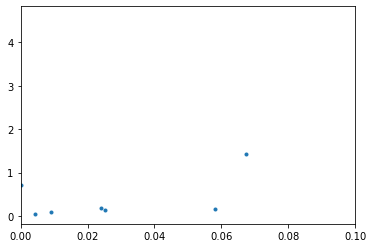

In [100]:
plt.plot(df2['MASS'][habitable],df2['A'][habitable],'.')
plt.xlim(0,0.1)